# Netflix Movies: Ratings Visualisation and Observations

In [1]:
from IPython.display import Video

Video("Netflix.mp4", mimetype="video/mp4", width=900, height=450)

### Installing necessary packages...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import geopy
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from wordcloud import WordCloud
from IPython.display import HTML

# Reading the files with netflix movies, ratings and genres 

Reading the first file...

In [13]:
movies_ratings = pd.read_csv("./netflix_list-2.csv")

In [14]:
movies_ratings.drop(columns=['image_url', 'isAdult'], inplace = True)

In [15]:
data1_shape = movies_ratings.shape

In [16]:
print(f"There are {data1_shape[0]} observations and {data1_shape[1]} feautures in this dataset.")

There are 7008 observations and 17 feautures in this dataset.


In [17]:
print(movies_ratings.columns)

Index(['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'genres', 'cast'],
      dtype='object')


Reading the second file...

In [125]:
movies_3 = pd.read_csv("./IMDB-Movie-Data.csv.xls")

In [126]:
data2_shape = movies_3.shape

In [127]:
print(f"There are {data2_shape[0]} observations and {data2_shape[1]} feautures in this dataset.")

There are 1000 observations and 12 feautures in this dataset.


In [128]:
print(movies_3.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


# Cleaning the datasets

## Cleaning the movies_ratings dataset...

In [22]:
nan_counts = movies_ratings.isna().sum()

In [23]:
nan_counts

imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language            0
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
cast                0
dtype: int64

In [24]:
mean_rating = movies_ratings['rating'].mean()

In [25]:
mean_rating = "{:.1f}".format(mean_rating)

In [26]:
mean_rating

'6.7'

As we have undefined values for ratings but they are important for our research, we fill these values with the mean rating of the movies. 

In [27]:
movies_ratings['rating'] = movies_ratings['rating'].fillna(mean_rating)

In [28]:
movies_ratings['rating'] = movies_ratings['rating'].astype(float)

## Cleaning the movies_3 dataset...

In [129]:
nan_counts_2 = movies_3.isna().sum()

In [130]:
nan_counts_2

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [131]:
mean_revenue = movies_3['Revenue (Millions)'].mean()

In [132]:
mean_revenue = "{:.1f}".format(mean_revenue)

In [133]:
movies_3['Revenue (Millions)'] = movies_3['Revenue (Millions)'].fillna(mean_revenue)

In [134]:
mean_metascore = movies_3['Metascore'].mean()

In [135]:
mean_metascore = "{:.1f}".format(mean_metascore)

In [136]:
movies_3['Metascore'] = movies_3['Metascore'].fillna(mean_metascore)

In [137]:
movies_3.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [138]:
movies_3

Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating   Votes Revenue (Millions) Metascore  
0                  121     8.1  757074             333.13      76.0  
1                  124     7.0  485820             126.46      65.0  
2                  117     7.3  157606             138.12      62.0  
3                  108     7.2   60545             270.32      59.0  
4                  123     6.2  393727             325.02      40.0  
..                 ...     ...     ...                ...       ...  
995                111     6.2   27585               83.0      45.0  
996                 94     5.5   73152              17.54      46.0  
997                 98     6.2   70699              58.01      50.0  
998                 93     5.6    4881               83.0      22.0  
999                 87     5.3   12435              19.64      11.0  

[1000 rows x 12 columns]

## We will find a connection between the country of production and the rating of the movies produced. 

In [39]:
mean_country_ratings = movies_ratings.groupby('orign_country')['rating'].mean()

In [40]:
mean_country_ratings = pd.DataFrame(mean_country_ratings)

In [41]:
mean_country_ratings.reset_index(inplace=True)

In [42]:
mean_country_ratings.rename(columns={'orign_country': 'Country', 'rating': "Mean Rating"}, inplace=True)

In [43]:
mean_country_ratings.replace('-', float('nan'), inplace=True)

In [44]:
mean_country_ratings = mean_country_ratings.dropna(subset=['Country'])

In [45]:
mean_country_ratings

Country  Mean Rating
1          Albania     6.100000
2        Argentina     6.057143
3        Australia     6.982716
4          Austria     6.744444
5          Bahamas     5.200000
..             ...          ...
77  United Kingdom     7.054921
78   United States     6.652327
79         Uruguay     7.014286
80       Venezuela     6.000000
81         Vietnam     6.866667

[81 rows x 2 columns]

# Let's visualise the realtionship between countries and the number of movies the they had produced.

In [46]:
counts_of_countries = movies_ratings['orign_country'].value_counts()

In [47]:
counts_of_countries = pd.DataFrame(counts_of_countries)

In [48]:
counts_of_countries.reset_index(inplace=True)

In [49]:
counts_of_countries.rename(columns={'index': 'Country', 'orign_country': 'Number of Movies'}, inplace=True)

In [50]:
counts_of_countries = counts_of_countries.replace('-', float('nan'))

In [51]:
counts_of_countries = counts_of_countries.dropna(subset=['Country'])

In [52]:
counts_of_countries = pd.merge(mean_country_ratings, counts_of_countries, on = 'Country')

In [53]:
counts_of_countries

Country  Mean Rating  Number of Movies
0          Albania     6.100000                 1
1        Argentina     6.057143                63
2        Australia     6.982716                81
3          Austria     6.744444                 9
4          Bahamas     5.200000                 1
..             ...          ...               ...
76  United Kingdom     7.054921               508
77   United States     6.652327              2836
78         Uruguay     7.014286                 7
79       Venezuela     6.000000                 1
80         Vietnam     6.866667                 3

[81 rows x 3 columns]

## First, let's try to do it on the map.

In [54]:
black = "#000000"
red = "#E50914"
white = "#F5F5F1"

In [55]:
color_scale = [[0, black], [1, red]]

In [56]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='my_app')
latitudes = []
longitudes = []
for country in counts_of_countries['Country']:
    location = geolocator.geocode(country)
    if location is not None:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)
        
counts_of_countries['Latitude'] = latitudes
counts_of_countries['Longitude'] = longitudes

In [57]:
fig = px.scatter_geo(
    counts_of_countries,
    lon='Longitude',
    lat='Latitude',
    hover_name='Country',
    hover_data={'Longitude': False, 'Latitude': False, 'Number of Movies': True, 'Mean Rating': True},
    size='Number of Movies',
    color='Mean Rating',
    color_continuous_scale=color_scale,
    projection='natural earth',
    title='Number of Movies and Mean Rating by Country'
)

Now we will update the layout and make it suitable to netflix style.

In [58]:
fig.update_layout(
    title='Number of Movies by Country',
    geo=dict(
        showland=False,
        showocean=True,
        showcountries=True,
        oceancolor=white,
        countrycolor=red,
        coastlinecolor=red,
        bgcolor=white,
        projection_type='equirectangular'
    ),
    width=1000,
    height=700
)


fig.add_annotation(
    x=1,
    y=0,
    xref='paper',
    yref='paper',
    text='This map shows the number of movies available on Netflix in different countries around the world.',
    font=dict(size=14, color='black'),
    showarrow=False
)

fig.show()

## Now we will show the variaty of mean ratings per country on the barplot but for countries that have produced more than 60 movies.

In [59]:
top_15_countries = counts_of_countries[counts_of_countries['Number of Movies'] > 60]

Now we will create palette matching the netflix colors.

In [60]:
palette = sns.color_palette("Reds_r", len(top_15_countries))
for i in range(len(palette)):
    palette[i] = (palette[i][0], palette[i][1], palette[i][2], i/len(palette))

In [61]:
top_15_countries = top_15_countries.sort_values('Mean Rating')

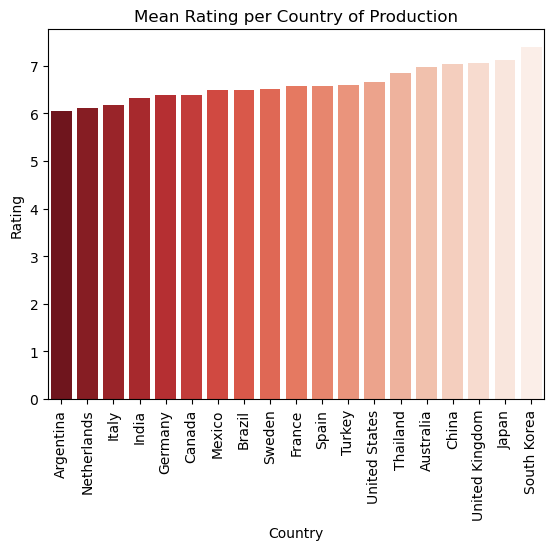

In [62]:
sns.barplot(x='Country', y='Mean Rating', data=top_15_countries, palette=palette)

plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Mean Rating per Country of Production")
plt.xticks(rotation=90)
plt.show()

We see that when we exclude the countries that have a very few movies produced, the highest rating among the ones that produced more than 60 movies, is South Korea.

# Finding connection between types of recordings and their ratings.

In [63]:
mean_type_ratings = movies_ratings.groupby('type')['rating'].mean()

In [64]:
mean_type_ratings = pd.DataFrame(mean_type_ratings)

In [65]:
mean_type_ratings.reset_index(inplace=True)

In [66]:
mean_type_ratings.rename(columns={'type': 'Type', 'rating': 'Rating'}, inplace = True)

In [67]:
mean_type_ratings.sort_values(by = 'Rating', inplace=True)

[]

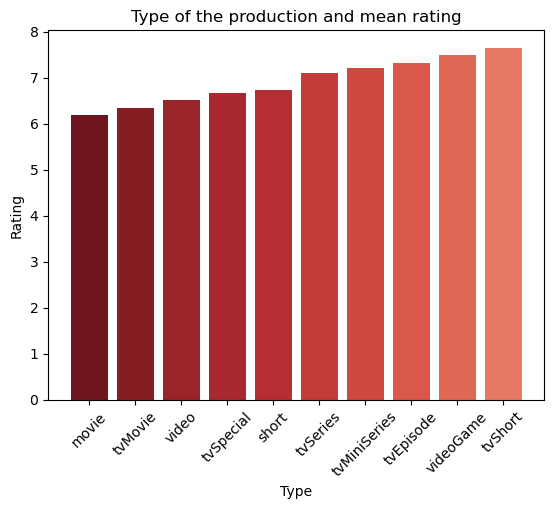

In [68]:
sns.barplot(x=mean_type_ratings['Type'], y=mean_type_ratings['Rating'], palette = palette)

plt.xlabel("Type")
plt.ylabel("Rating")
plt.title("Type of the production and mean rating")
plt.xticks(rotation=45)
plt.plot()

The graph shows that higher ratings are given to short tv-series, then video-games and tv-episodes. Surprisingly, movies are getting the lowest ratings on Netflix. However, we see that the ratings for the first ones do not vary that much. 

# Finding a connection between types and numbers of production. 

In [69]:
counts_of_types = movies_ratings['type'].value_counts()

In [70]:
counts_of_types = pd.DataFrame(counts_of_types)

In [71]:
counts_of_types.reset_index(inplace=True)

In [72]:
counts_of_types.rename(columns = {'index': "Type", 'type': 'Count'}, inplace=True)

In [73]:
counts_of_types.sort_values("Count", inplace=True)

[]

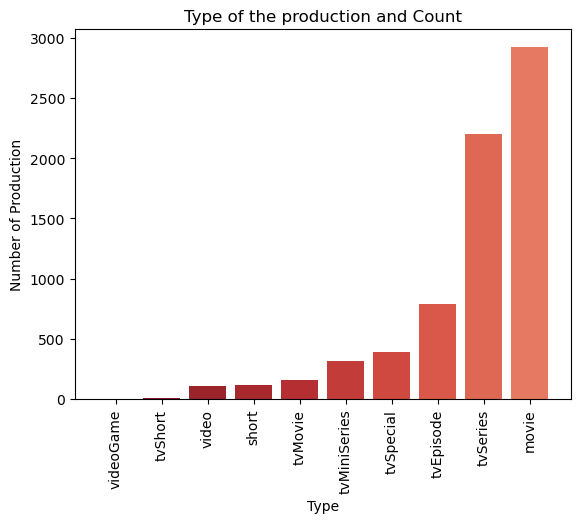

In [74]:
sns.barplot(x=counts_of_types['Type'], y=counts_of_types['Count'], palette = palette)

plt.xlabel("Type")
plt.ylabel("Number of Production")
plt.title("Type of the production and Count")
plt.xticks(rotation=90)

plt.plot()

Based on this graph, we can see that the most frequent types are movies then tv-series and the others are more than twice less then these ones.

# We will find Top 10 Movies with their ratings and their Directors

In [75]:
movies_3.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

In [76]:
top_10 = movies_3.nlargest(10, 'Rating')[['Title', 'Rating', 'Director']]\
.set_index('Title')

In [77]:
palette_10 = sns.color_palette("Reds_r", len(top_10))
for i in range(len(palette)):
    palette[i] = (palette[i][0], palette[i][1], palette[i][2], i/len(palette))

[]

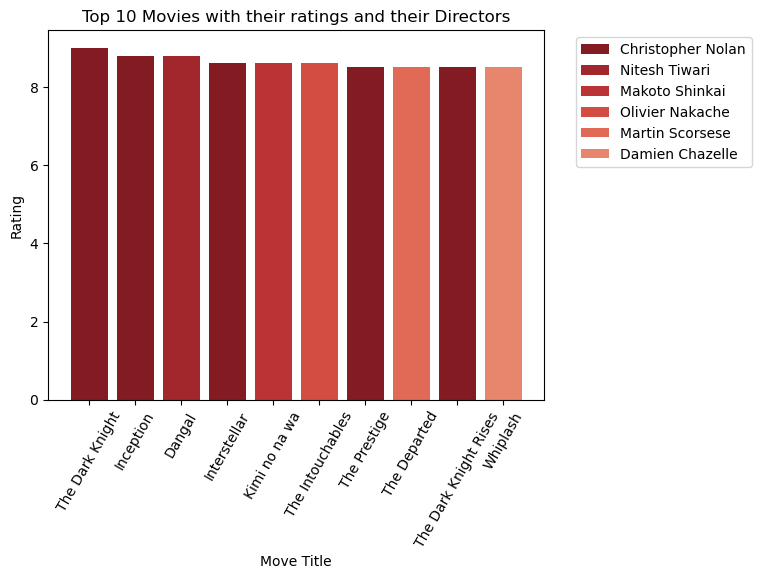

In [78]:
sns.barplot(x=top_10.index, y='Rating', data=top_10, hue='Director',dodge=False, palette=palette_10)
plt.xlabel("Move Title")
plt.ylabel("Rating")

plt.xticks(rotation=60)
plt.title('Top 10 Movies with their ratings and their Directors')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)


plt.plot()

Here we see that the movies that had the same direcors have the same colors, so it is obvious that the directors that produced high rank movies aree repeated and Christopher Nolan is the best director on Netflix with hid Dark Knight. 

## In this part we will try top find is there a connection between Rating and Revenue. 

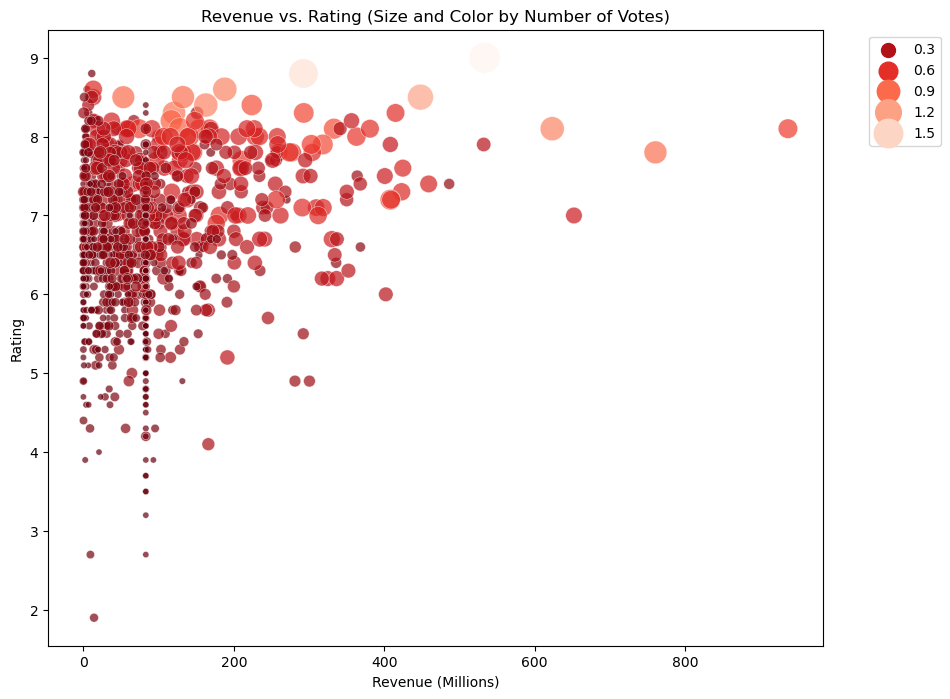

In [79]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Revenue (Millions)', y='Rating', size='Votes', hue='Votes', data=movies_3, ax=ax, sizes=(20, 500), alpha=0.7, palette='Reds_r')

# Set title and axis labels
ax.set_title('Revenue vs. Rating (Size and Color by Number of Votes)')
ax.set_xlabel('Revenue (Millions)')
ax.set_ylabel('Rating')

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', title='Votes')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

plt.show()

By this scatterlopt we see that there are movies that have high reatings but their revenues are very low. 

# As part of our research we want to compare two genres and see which one is more popular among people for a period of time. 

In [80]:
subset_df = movies_ratings[['startYear', 'genres', 'rating']]

In [81]:
comedy_subset_df =subset_df[subset_df['genres'] == 'Comedy']

In [82]:
oldest_movie = comedy_subset_df.loc[comedy_subset_df['startYear'].idxmin()]
oldest_movie

startYear    1932.0
genres       Comedy
rating          5.3
Name: 5790, dtype: object

In [83]:
newest_movie = comedy_subset_df.loc[comedy_subset_df['startYear'].idxmax()]
newest_movie

startYear    2022.0
genres       Comedy
rating          6.7
Name: 4451, dtype: object

In [84]:
drama_subset_df =subset_df[subset_df['genres'] == 'Drama,Romance']

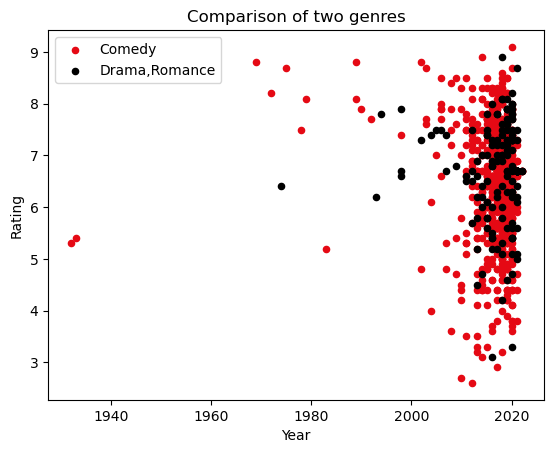

In [85]:
ax = comedy_subset_df.plot(kind='scatter', x='startYear', y='rating', label='Comedy', color = red)

drama_subset_df.plot(kind='scatter', x='startYear', y='rating', label='Drama,Romance', ax=ax, color = black)
plt.title('Comparison of two genres')
plt.xlabel('Year')
plt.ylabel('Rating')

plt.show()

As we can notice, the ratings of movies with genre "Drama, Romance" start from around 1975 while "Comedy"s ratings start from early 1930s. Overall, according to the scatterplot we can assume that people watched Comedies more that Drama,Romances.

## We are thinking that it would be interesting to find out which words are common in movie titles, so we will try to visualise it by using wordcluds. 

In [178]:
import matplotlib.colors as mcolors

colors = [red, black]
cmap = mcolors.ListedColormap(colors)

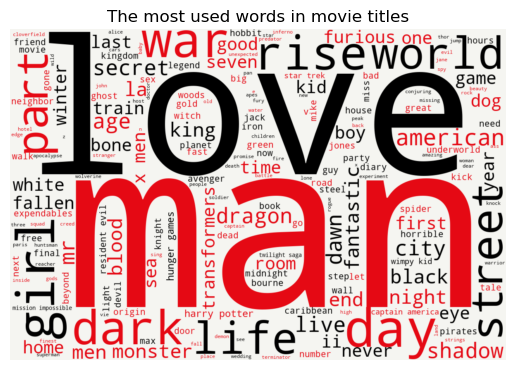

In [91]:
from wordcloud import WordCloud

titles = movies_3['Title'].str.lower()

text = ' '.join(titles)

wordcloud = WordCloud(width=1200, height=800, background_color='#F5F5F1', colormap=cmap).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("The most used words in movie titles")
plt.show()

The words that are the biggest are the most common ones used in the movie titles.

## Now we will use the wordclouds to see which genres were used the most. 

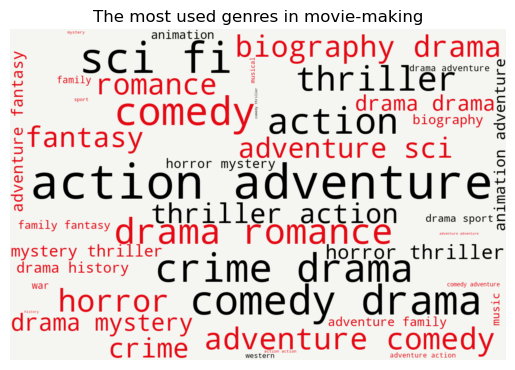

In [92]:
genres_1 = movies_3['Genre'].str.lower()

text = ' '.join(genres_1)

wordcloud = WordCloud(width=1200, height=800, background_color='#F5F5F1', colormap=cmap).generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most used genres in movie-making")
plt.axis('off')
plt.show()

# We will show the relationship between years and types of movies.

In [93]:
movies_ratings = movies_ratings.loc[movies_ratings['startYear'] >= 2011]

movies_grouped = movies_ratings.groupby(['startYear', 'type']).size().reset_index(name='count')
types = movies_grouped['type'].unique()

palette_red = sns.color_palette("Reds", len(types))

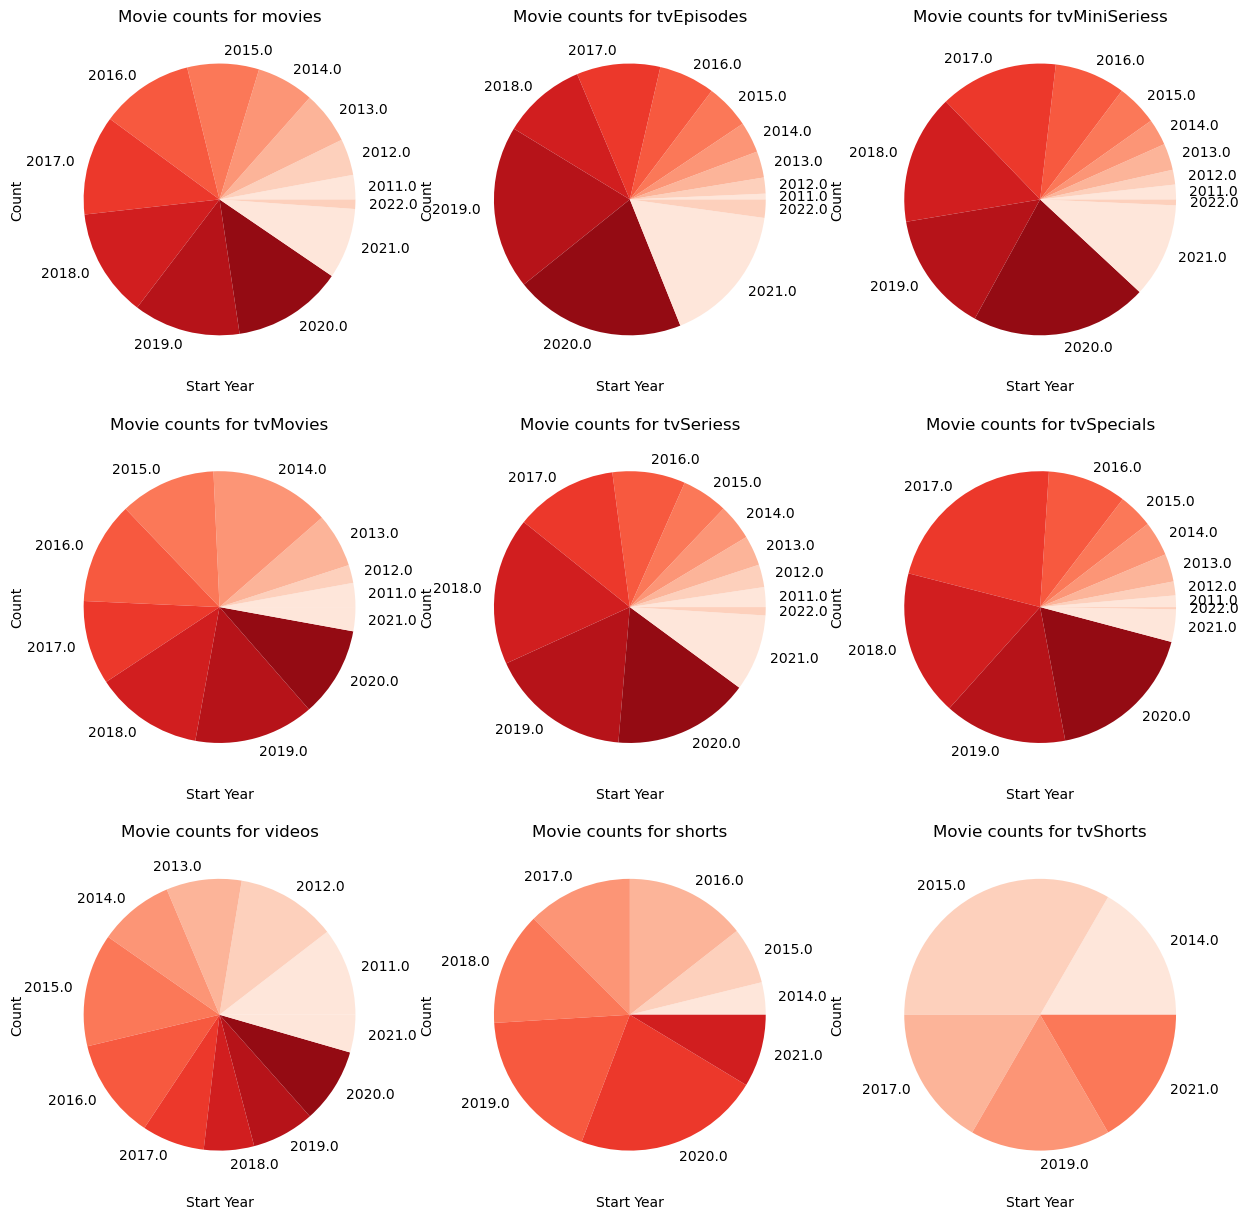

In [94]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, t in enumerate(types):
    data = movies_grouped[movies_grouped['type'] == t]
    if i < len(axs):
        axs[i].pie(data['count'], labels=data['startYear'], colors=palette_red)
        axs[i].set_title('Movie counts for {}s'.format(t))
        axs[i].set_xlabel('Start Year')
        axs[i].set_ylabel('Count', labelpad=15)
for j in range(len(types), len(axs)):
    axs[j].axis('off')

plt.show()

The piecharts above show the distribution of years for produced types.
- Movies were produced almost in the sam counts from 2016-2020, and then much less. 
- TV Episodes became more popular in 2019, and were produced in the sam eamounts. 
- Mini Series show the same results as TV Episodes.
- TV Movies were popular in 2014 and after it were produced in the same amounts. 
- TV Series became popular in 2017. 
- TV Specials reached their peak in 2017, and then were produced less. 

# Let's see if we can find any correltion among the variables we have.

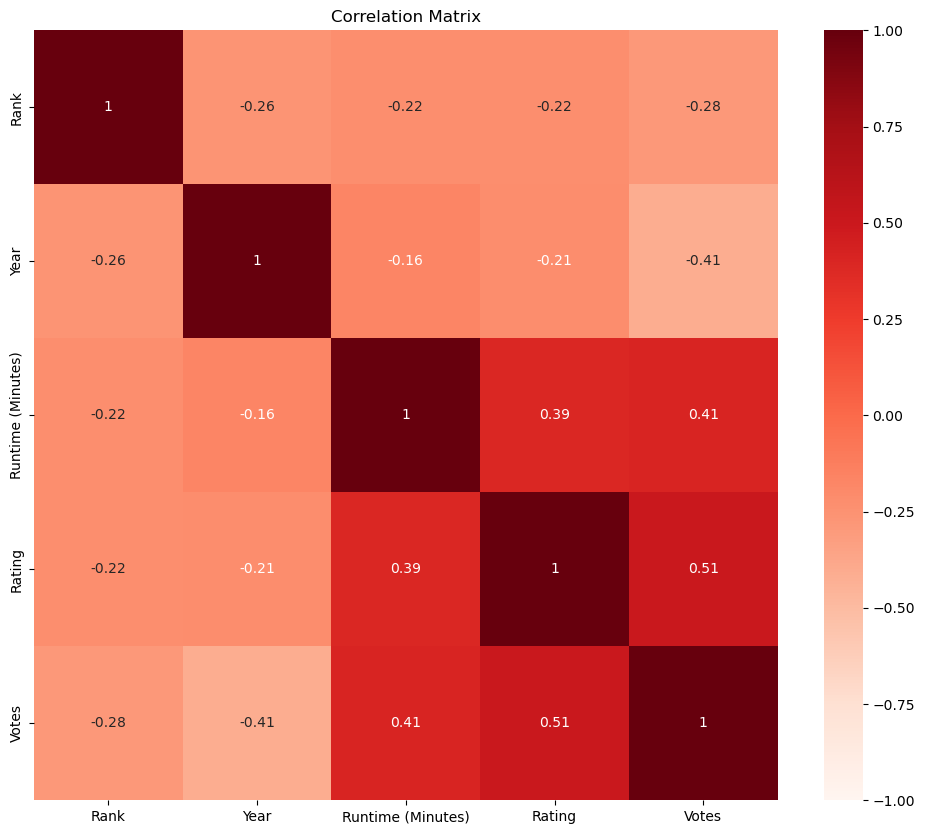

In [183]:
corr_matrix = movies_3.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

With this correlation matrix we see that the votes and runtime have much higher correlation and votes and rating as well. Also the number of votes is not correlated with the year of production. 

# Now we will find the connection between Genres and Metascores. 

We will change the dataset so in Main Genre will be the first genre written which we consider the main one.

In [187]:
movies_3['Main Genre'] = movies_3['Genre'].str.split(',').str[0]

In [188]:
movies_3['Metascore'] = pd.to_numeric(movies_3['Metascore'], errors='coerce')

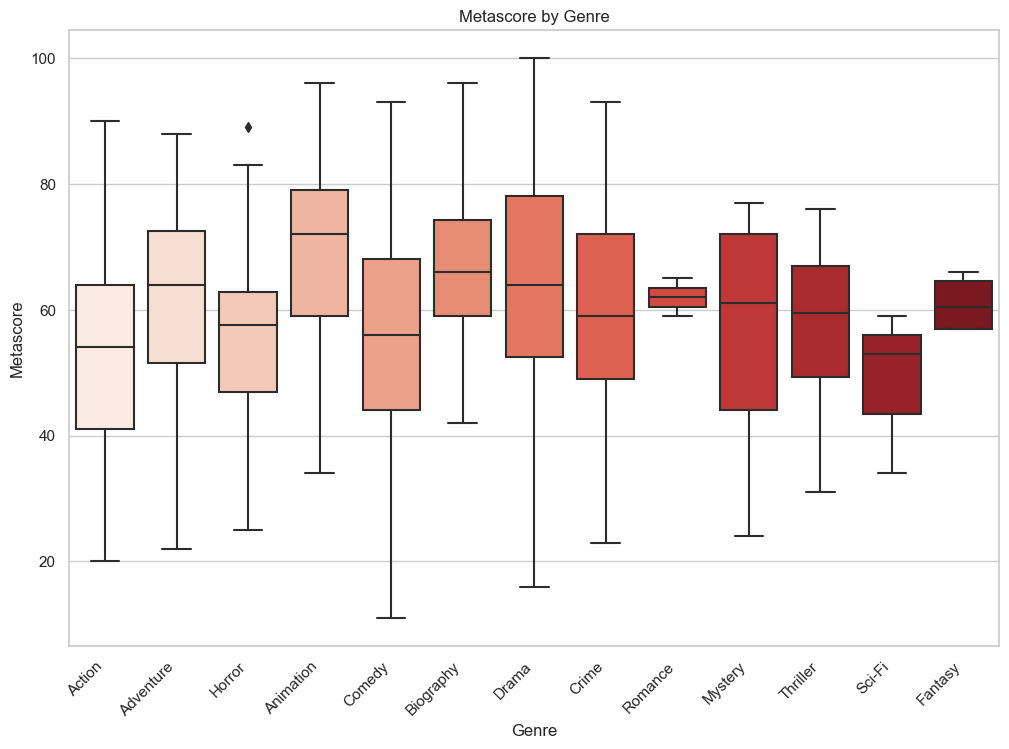

In [192]:
plt.figure(figsize=(12, 8))


sns.set_style("whitegrid")
sns.set_palette("Reds")


sns.boxplot(x="Main Genre", y="Metascore", data=movies_3, palette="Reds")

plt.xticks(rotation=45, ha='right')
plt.title("Metascore by Genre")
plt.xlabel('Genre')
plt.ylabel('Metascore')

plt.show()

This picture shows us that high rating have Dramas and also the mean ratings for each genre. 

# Now we will find movies that contain violence in them

In [95]:
violent_words = ['abuse', 'ambush', 'annihilate', 'arson', 'assassinate', 'assault', 'attack', 'battle', 'beat', 'brawl', 'break', 'bruise', 'burn', 'butcher', 'chase', 'choke', 'club', 'combat', 'commit', 'convulse', 'crush', 'cut', 'damage', 'defeat', 'demolish', 'destroy', 'devastate', 'die', 'disembowel', 'dismember', 'dissect', 'drown']

In [96]:
def contains_violence(summary):
    words = nltk.word_tokenize(summary)
    pos_tags = nltk.pos_tag(words)
    for word, pos in pos_tags:
        if pos.startswith('VB') and word in violent_words:
            return True
    return False

In [97]:
movies_ratings['contains_violence'] = movies_ratings['summary'].apply(contains_violence)

In [98]:
violent_movies = movies_ratings[movies_ratings['contains_violence'] == True]
print("Number of observations of the dataset 'violent movies':", violent_movies.shape[0])
print("Number of feautures of the dataset 'violent movies':", violent_movies.shape[1])

Number of observations of the dataset 'violent movies': 213
Number of feautures of the dataset 'violent movies': 18


In [99]:
print(f"There are {len(violent_movies)} movies most likely containing violence in the dataset.")

There are 213 movies most likely containing violence in the dataset.


## Let's see what movies we can suggest for not adults. 

In [100]:
no_violent_movies = movies_ratings[movies_ratings['contains_violence'] == False]

In [101]:
no_violent_movies = no_violent_movies.loc[no_violent_movies['rating'] > 9, ['title', 'type', 'rating', 'genres']]

In [102]:
random_no_viol = no_violent_movies.sample(n=5)

In [103]:
random_no_viol 

title          type  rating  \
6714                     Longmire     tvEpisode     9.2   
518                The Last Dance  tvMiniSeries     9.1   
6459       Middleditch & Schwartz     tvEpisode     9.1   
3876  Hans Zimmer: Live in Prague     tvSpecial     9.1   
3636       CM101MMXI Fundamentals         movie     9.2   

                             genres  
6714             Action,Crime,Drama  
518   Biography,Documentary,History  
6459                         Comedy  
3876              Documentary,Music  
3636             Comedy,Documentary

# Getting the sentiment level of the text.

In [104]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


In [105]:
movies_ratings['sentiment_polarity'] = movies_ratings['summary'].apply(get_sentiment)

In [106]:
print(movies_ratings.head(1))

     imdb_id    title popular_rank certificate  startYear  endYear  episodes  \
0  tt4052886  Lucifer            1          15     2016.0      NaN      93.0   

  runtime      type  orign_country language  \
0      42  tvSeries  United States  English   

                                                plot  \
0  Lucifer Morningstar has decided he's had enoug...   

                                             summary  rating  numVotes  \
0  Lucifer Morningstar, bored from his sulking li...     8.1  250884.0   

                genres                                               cast  \
0  Crime,Drama,Fantasy  ['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...   

   contains_violence  sentiment_polarity  
0              False           -0.154545  


The range of the sentiment level is from -1 to 1. -1 means that the movie affects your mood negatively, while 1 means that it affects positively. Therefore, we will create a dataset of movies that will help you experience positive emotions. 

In [107]:
movies_ratings['sentiment_polarity'] = (movies_ratings['sentiment_polarity']).astype(float)

positive_movies = movies_ratings[movies_ratings['sentiment_polarity'] > 0.5]

In [108]:
print(f"There are {len(positive_movies)} movies in Netflix that can help you to increase your mood.")

There are 132 movies in Netflix that can help you to increase your mood.


In [109]:
positive_movies[positive_movies['contains_violence'] == True]

imdb_id                                   title popular_rank  \
1086  tt6010920                              White Gold        1,092   
6824  tt6493160   Lego Friends: The Power of Friendship       13,331   

     certificate  startYear  endYear  episodes runtime       type  \
1086         NaN     2017.0   2019.0      12.0      30   tvSeries   
6824         NaN     2016.0      NaN       NaN      \N  tvEpisode   

       orign_country language  \
1086  United Kingdom  English   
6824               -        -   

                                                   plot  \
1086  The story of a double-glazing showroom in Esse...   
6824  With their basketball season headed for disast...   

                                                summary  rating  numVotes  \
1086  The story of a double-glazing showroom in Esse...     7.4    9765.0   
6824  The Friends' basketball team, the Streaks, is ...     6.7       NaN   

         genres                                               cast  \
1086     Comedy  ['Ed Westwick', 'James Buckley', 'Joe Thomas',...   
6824  Animation  ['Mike Davis', 'Debbie Gatton', 'Chris Hackney...   

      contains_violence  sentiment_polarity  
1086               True                0.65  
6824               True                0.70

We see that there are only 2 movies containing violence and one of them is a cartoon and the other one is a sitcom. Therefore, the results are very close to reality. 

In [110]:
positive_movies = positive_movies.loc[positive_movies['rating'] > 8, ['title', 'type', 'rating', 'genres', 'sentiment_polarity']]

So if you are in a bad mood we can suggest you some movies that will make you happier. 

In [111]:
random_rows = positive_movies.sample(n=5)

random_rows

## Now let's see whether the movie production was high during the covid pandemic.

In [112]:
movies_ratings_subset = movies_ratings.loc[:, ['title', 'startYear']]
movies_ratings_filtered = movies_ratings_subset[movies_ratings_subset['startYear'] == 2021]
count_movies = len(movies_ratings_filtered)

count_movies

546

In [113]:
movies_ratings_filtered_1 = movies_ratings_subset[movies_ratings_subset['startYear'] == 2020]
count_movies_1 = len(movies_ratings_filtered_1)

count_movies_1

917

We see that the number of movies produced during the Covid pandemic was 546 and before covid it is 917. Therefore, we can say that the pandemic affected the movie industry significantly.

# Making the presentation more engaging... 

### Firsly, let's see in how many Netflix movies your favorite actors starred.

In [114]:
while True:
    wanted_actor = input("Who is your favorite actor?: ")
    if (wanted_actor == "break"):
        break
    else:
        movies_by_actor = movies_ratings[movies_ratings['cast'].str.contains(wanted_actor)]
        print(movies_by_actor['title'])
        print(f"Your favorite actor {wanted_actor} participatd in {len(movies_by_actor)} Netflix produced movies.")


Who is your favorite actor?: break


### Now based on the genre you prefer, we will make some suggestions to you.

We will subset the dataframe, so it will include movies with higher rating than 8.

In [115]:
genre_movies = movies_ratings.loc[movies_ratings['rating'] > 8, ['title', 'type', 'rating', 'genres']]

In [116]:
genre_movies = genre_movies.sort_values(by='rating', ascending=False)

In [117]:
while True:
    preferred_genre = input("Tell us your preferred genre: ")
    if preferred_genre == "break":
        break
        print("You have successfully exited the platform")
    else:
        genre_movies_filtered = genre_movies[genre_movies['genres'].str.contains(preferred_genre)]

        print(genre_movies_filtered)

Tell us your preferred genre: break


# At this point our presentation comes to its logical end as every good thing ends one day.

In [118]:
url = 'https://i.giphy.com/media/JJR2n3I7vVisE/giphy.webp'  


width = 1000
height = 1000


html_code = f'<img src="{url}" width="{width}" height="{height}">'
display(HTML(html_code))